# Single-Mode Models of Pulsed Lasers

### [1] RGB - "Fundamentals of Laser Modeling, Simulation, and Design" (rgb_laser_physics.pdf)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=np.inf)
from IPython.display import display, Math
import laser.smlmod as sml

## Evolution Equations for Single-Mode 1D Lasers

We begin with the single-mode ODEs presented in Sec. 4.4 of [1]:
\begin{align}
  \dot{E}(t) &= -\frac{1}{2\, \tau_p} \left(1 - i\, 2\, \delta \omega_0\, \tau_p \right) E(t) + F(t)\, , \\
  \dot{F}(t) &= -\frac{1}{\tau_\perp} \left[ \left( 1 - i\, \Omega \right) F(t) - \frac{1}{2}\, G(t)\, E(t) \right]\, , \textrm{and} \\
  \dot{G}(t) &= -\frac{1}{\tau_\parallel} \left\{ G(t) - G_0(t) + 2\, \kappa\, \operatorname{Re} \left[E^\ast(t)\, F(t) \right] \right\}\, ,
\end{align}
where $\tau_p$ is the photon lifetime, $\Omega \equiv (\omega_0 + \delta \omega_0 - \omega_{a b}) \tau_\perp$ is the normalized detuning, and
 \begin{equation}
 \kappa \equiv
 \begin{cases}
   1 & \mbox{Unidirectional Ring Laser (URL)}, \\
   2 & \mbox{Standing-Wave Laser (SWL)}.
 \end{cases}
 \end{equation}
Note that implicit in these equations is the spatial dependence of the lowest-order eigenmodes developed in Chap. 4 and used extensively in Chap. 5 to describe single-mode continuous-wave lasers.

We assume that the Rate Equation Approximation (REA) is valid, so that $\dot{F}(t) \approx 0$ and
\begin{equation}
  F(t) = \frac{1}{2\, (1 - i\, \Omega) }\, G(t)\, E(t)\, .
\end{equation}
Next, we define $I(t) \equiv |E(t)|^2$, and calculate its derivative as
\begin{equation}
  \dot{I}(t) = E^\ast(t)\, \dot{E}(t) + E(t)\, \dot{E}^\ast(t) = -\frac{1}{\tau_p}\, I(t) + 2\, \operatorname{Re} \left[E^\ast(t)\, F(t) \right]\, .
\end{equation}
Since
\begin{equation}
  2\, \operatorname{Re} \left[E^\ast(t)\, F(t) \right] = \frac{G(t)\, I(t)}{1 + \Omega^2}\, ,
\end{equation}
our evolution equations now have the form
\begin{align}
  \dot{I}(t) &= -\frac{1}{\tau_p} I(t) + \frac{G(t)\, I(t)}{1 + \Omega^2}\, , \textrm{and} \\
  \dot{G}(t) &= -\frac{1}{\tau_\parallel} \left[ G(t) - G_0(t) + \kappa\, \frac{G(t)\, I(t)}{1 + \Omega^2} \right]\, .
\end{align}

Let's rescale our gain and intensity variables to simplify these equations further. We'll express the gain $G(t)$ and the pump $G_0(t)$ in terms of the threshold gain $G_\mathrm{th} = (1 + \Omega^2)/\tau_p$, and the intensity $I(t)$ in terms of the fluence $J(t)$:
\begin{align}
  H(t) &\equiv \frac{G(t)}{G_\mathrm{th}}\, \textrm{ and} \\
  J(t) &\equiv \frac{I(t)}{\tau_\parallel\, (1 + \Omega^2)}\, .
\end{align}
If we also include an integrated round-trip $Q$-switch loss $\alpha_\mathrm{QS}(t)$, then our final evolution equations are
\begin{align}
  \dot{J}(t) &= \left\{ \frac{1}{\tau_p} \left[ H(t) - 1 \right] - \alpha_\mathrm{QS}(t) \right\} J(t)\, , \textrm{and} \\
  \dot{H}(t) &= H_0(t) - \frac{1}{\tau_\parallel}\, H(t) - \kappa\, J(t)\, H(t)\, .
\end{align}

## Tests

### Pump and Switch Shapes

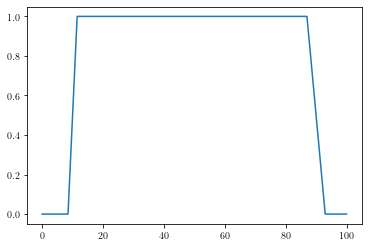

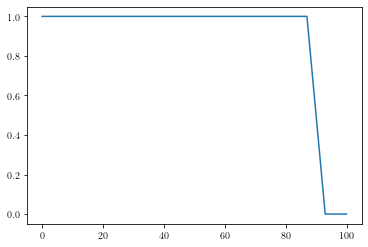

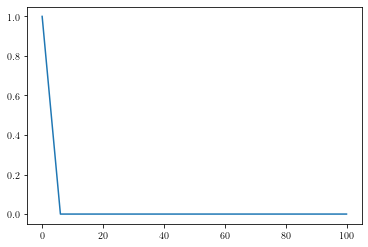

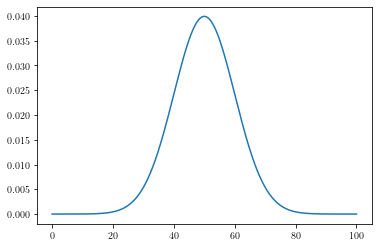

In [7]:
t = np.linspace(0, 100, num=1001, endpoint=True)

pump = sml.TrapAcute(1.0, 10.0, 90, 3.0, 6.0)
plt.plot(t, pump.shape(t))
plt.show()

pump = sml.TrapRight(1.0, 90, 6.0)
plt.plot(t, pump.shape(t))
plt.show()

pump = sml.LinearDrop(1.0, 6.0)
plt.plot(t, pump.shape(t))
plt.show()

pump = sml.Gaussian(1.0, 20.0, 50.0)
plt.plot(t, pump.shape(t))
plt.show()

### Fast Q-Switched Laser

PulsedLaser : ODEIntegrator
_tau_par : 1000.0
_tau_pho : 10.0
_kappa : 1
_pump : <laser.smlmod.Const object at 0x0000024220004610>
_switch : <laser.smlmod.Const object at 0x00000242200049D0>
_calls : 0

Elapsed time: 18.2 ms (RK45)
Derivative function calls: 176 (9.66e+03 calls/sec)


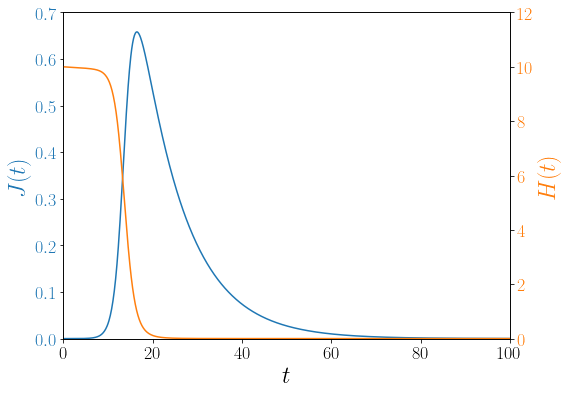

In [8]:
tau_par = 1000.0
tau_pho = 10.0
kappa = 1

pump = sml.Const()      # Zero pump after t = 0
switch = sml.Const()    # Switch open after t = 0

y_0 = np.array([0.0,    # Initial fluence is 0
                10.0])  # Initial gain is 10x threshold
t_max = 100             # Maximum integration time
npts = 1001             # Set to None to let the solver choose t_eval

model = sml.PulsedLaser(tau_par=tau_par,  # Gain lifetime (units of round-trip time)
                        tau_pho=tau_pho,  # Photon lifetime (units of round-trip time)
                        kappa=kappa,      # URL: kappa = 1; SWL: kappa = 2
                        pump=pump,        # Gain pump (Shape object)
                        switch=switch)    # Q-switch (Shape object)
print(model)

sol = model.integrate(t_max, y_0, npts=npts)

### Slow Q-Switched Laser

PulsedLaser : ODEIntegrator
_tau_par : 1000.0
_tau_pho : 10.0
_kappa : 1
_pump : <laser.smlmod.Const object at 0x000002422002AEE0>
_switch : <laser.smlmod.LinearDrop object at 0x0000024220012EE0>
_calls : 0

Elapsed time: 40.2 ms (RK45)
Derivative function calls: 380 (9.46e+03 calls/sec)


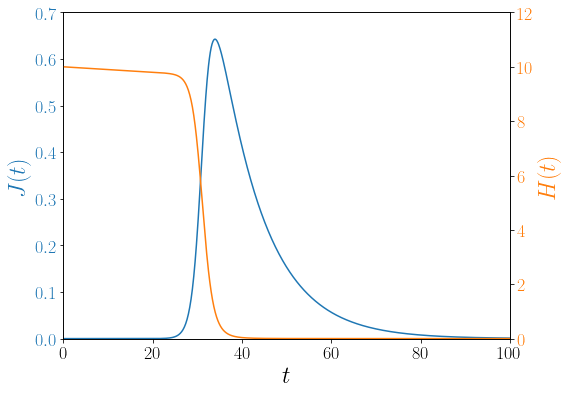

In [9]:
tau_par = 1000.0
tau_pho = 10.0
kappa = 1

pump = sml.Const()              # Zero pump after t = 0
switch = sml.LinearDrop(10.0,   # Switch is on with alpha = 10 at t = 0, ...
                        20.0)   # ... then drops to zero at t = 20

y_0 = np.array([0.0,            # Initial fluence is 0
                10.0])          # Initial gain is 10x threshold
t_max = 100                     # Maximum integration time
npts = 1001                     # Set to None to let the solver choose t_eval

model = sml.PulsedLaser(tau_par=tau_par,  # Gain lifetime (units of round-trip time)
                        tau_pho=tau_pho,  # Photon lifetime (units of round-trip time)
                        kappa=kappa,      # URL: kappa = 1; SWL: kappa = 2
                        pump=pump,        # Gain pump (Shape object)
                        switch=switch)    # Q-switch (Shape object)
print(model)

sol = model.integrate(t_max, y_0, npts=npts)

### Full Q-Switched Laser

PulsedLaser : ODEIntegrator
_tau_par : 1000.0
_tau_pho : 10.0
_kappa : 1
_pump : <laser.smlmod.TrapAcute object at 0x000002421FF62E20>
_switch : <laser.smlmod.TrapRight object at 0x00000242200B8160>
_calls : 0

Elapsed time: 1.41e+02 ms (RK45)
Derivative function calls: 1358 (9.61e+03 calls/sec)


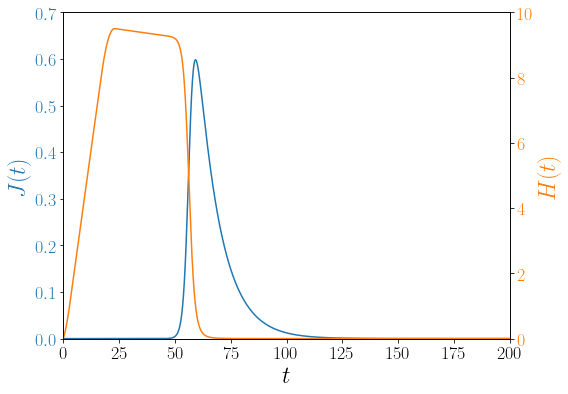

In [10]:
tau_par = 1000.0
tau_pho = 10.0
kappa = 1

pump = sml.TrapAcute(10.0/20.0, # Max pump is 10x threshold
                     0.0,       # Pump turns on at t = 0  (units of round-trip time)
                     20.0,      # Pump turns off at t = 20  (units of round-trip time)
                     6.0,       # Pump rise-time (units of round-trip time)
                     6.0)       # Pump fall time (units of round-trip time)
switch = sml.TrapRight(10.0,   # Switch is on w alpha = 10 at t = 0 
                       40.0,    # Switch turns off at t = 30 ...
                       6.0)     # ... with a fall time of 6.0 (units of round-trip time)

y_0 = np.array([0.0,            # Initial fluence is 0
                0.0])           # Initial gain is 0x threshold
t_max = 200                     # Maximum integration time
npts = 1001                     # Set to None to let the solver choose t_eval

model = sml.PulsedLaser(tau_par=tau_par,  # Gain lifetime (units of round-trip time)
                        tau_pho=tau_pho,  # Photon lifetime (units of round-trip time)
                        kappa=kappa,      # URL: kappa = 1; SWL: kappa = 2
                        pump=pump,        # Gain pump (Shape object)
                        switch=switch)    # Q-switch (Shape object)
print(model)

sol = model.integrate(t_max, y_0, npts=npts)

### Gain-Switched Laser

PulsedLaser : ODEIntegrator
_tau_par : 1000.0
_tau_pho : 10.0
_kappa : 1
_pump : <laser.smlmod.Gaussian object at 0x0000024220041E50>
_switch : <laser.smlmod.Const object at 0x0000024220041850>
_calls : 0

Elapsed time: 25.9 ms (RK45)
Derivative function calls: 236 (9.11e+03 calls/sec)


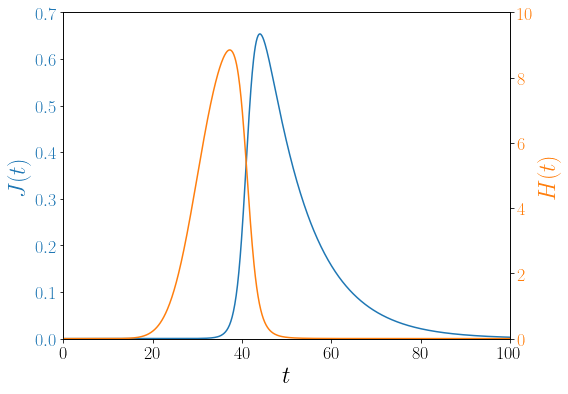

In [11]:
tau_par = 1000.0
tau_pho = 10.0
kappa = 1

pump = sml.Gaussian(10.0,   # Total gain in the pump pulse (10x threshold)
                    10.0,   # Pulse width (units of round-trip time)
                    30.0)   # Time of pulse max (units of round-trip time)
switch = sml.Const()        # No switch

y_0 = np.array([0.0,        # Initial fluence is 0
                0.0])       # Initial gain is 0
t_max = 100                 # Maximum integration time
npts = 1001                 # Set to None to let the solver choose t_eval


model = sml.PulsedLaser(tau_par=tau_par,  # Gain lifetime (units of round-trip time)
                        tau_pho=tau_pho,  # Photon lifetime (units of round-trip time)
                        kappa=kappa,      # URL: kappa = 1; SWL: kappa = 2
                        pump=pump,        # Gain pump (Shape object)
                        switch=switch)    # Q-switch (Shape object)
print(model)

sol = model.integrate(t_max, y_0, npts=npts)